In [164]:
%matplotlib inline
import matplotlib
import seaborn as sns
import pandas as pd
sns.set()
from sklearn.feature_extraction import text
from sklearn import linear_model
from sklearn.svm import SVR
matplotlib.rcParams['figure.dpi'] = 144
from sklearn import base
import numpy as np
from sklearn.feature_extraction import text
from sklearn.svm import SVR

In [2]:
from static_grader import grader

In [3]:
!aws s3 sync s3://dataincubator-course/mldata/ . --exclude '*' --include 'yelp_train_academic_dataset_business.json.gz'

In [4]:
import ujson as json
import gzip

with gzip.open('yelp_train_academic_dataset_business.json.gz') as f:
    data = [json.loads(line) for line in f]

In [5]:
star_ratings = [row['stars'] for row in data]

In [6]:
df=pd.DataFrame.from_dict(data)

For many of the questions below, you will need to build and train an estimator that predicts the star rating given certain features.  This could be a custom estimator that you built from scratch, but in most cases will be a pipeline containing custom or pre-built transformers and an existing estimator.  We will give you hints of how to proceed, but the only requirement for you is to produce a model that does as well, or better, than the reference models we created.  You are welcome to do this however you like. The details are up to you.

The formats of the input and output to the `fit()` and `predict()` methods are ultimately up to you as well, but we recommend that you deal with lists or arrays, for consistency with the rest of Scikit Learn.  It is also a good idea to take the same type of data for the feature matrix in both `fit()` and `predict()`.  While it is tempting to read the stars from the feature matrix X, you should get in the habit of passing the labels as a separate argument to the `fit()` method.

You may find it useful to serialize the trained models to disk.  This will allow to reload it after restarting the Jupyter notebook, without needing to retrain it.  We recommend using the [`dill` library](https://pypi.python.org/pypi/dill) for this (although the [`joblib` library](http://scikit-learn.org/stable/modules/model_persistence.html) also works).  Use
```python
dill.dump(estimator, open('estimator.dill', 'w'))
```
to serialize the object `estimator` to the file `estimator.dill`.  If you have trouble with this, try setting the `recurse=True` keyword arguments in the call of `dill.dump()`.  The estimator can be deserialized by calling
```python
estimator = dill.load(open('estimator.dill', 'r'))
```

# Questions


Each of the "model" questions asks you to create a function that models the number of stars venues will receive.  It will be passed a list of dictionaries.  Each of these will have the same format as the JSON objects you've just read in.  Some of the keys (like the stars!) will have been removed.  This function should return a list of numbers of the same length, indicating the predicted star ratings.

This function is passed to the `score()` function, which will receive input from the grader, run your function with that input, report the results back to the grader, and print out the score the grader returned.  Depending on how you constructed your estimator, you may be able to pass the predict method directly to the `score()` function.  If not, you will need to write a small wrapper function to mediate the data types.


## city_avg

The venues belong to different cities.  You can image that the ratings in some cities are probably higher than others.  We wish to build an estimator to make a prediction based on this, but first we need to work out the average rating for each city.  For this problem, create a list of tuples (city name, star rating), one for each city in the data set.

There are many ways to do this; please feel free to experiment on your own.  If you get stuck, the steps below attempt to guide you through the process.

A simple approach is to go through all of the dictionaries in our array, calculating the sum of the star ratings and the number of venues for each city.  At the end, we can just divide the stars by the count to get the average.

We could create a separate sum and count variable for each city, but that will get tedious quickly.  A better approach to to create a dictionary for each.  The key will be the city name, and the value the running sum or running count.

One slight annoyance of this approach is that we will have to test whether a key exists in the dictionary before adding to the running tally.  The collections module's `defaultdict` class works around this by providing default values for keys that haven't been used.  Thus, if we do

In [7]:
from collections import defaultdict
star_sum = defaultdict(int)
count = defaultdict(int)

we can increment any key of `stars` or `count` without first worrying whether the key exists.  We need to go through the `data` and `star_ratings` list together, which we can do with the `zip()` function.

In [8]:
df[['city','stars']].head()

,city,stars
0,Phoenix,3.5
1,De Forest,4.0
2,De Forest,4.0
3,De Forest,4.5
4,De Forest,4.0


In [9]:
avg_df=df[['city','stars']].groupby('city')['stars'].mean().reset_index()

In [10]:
avg_df.stars.mean()

3.712759336095808

In [11]:
avg_df.set_index('city').T.to_dict('records')[0]

{'Ahwatukee': 3.6875,
 'Anthem': 3.7818181818181817,
 'Apache Junction': 3.6375,
 'Arcadia': 5.0,
 'Atlanta': 3.5,
 'Avondale': 3.53862660944206,
 'Black Canyon City': 3.0,
 'Bonnyrigg': 3.75,
 'Boulder City': 4.136363636363637,
 'Buckeye': 3.408450704225352,
 'C Las Vegas': 3.0,
 'Cambridge': 4.2,
 'Carefree': 3.888888888888889,
 'Casa Grande': 3.5172413793103448,
 'Cave Creek': 3.9122137404580153,
 'Centennial Hills': 3.0,
 'Central City Village': 3.125,
 'Central Henderson': 3.5,
 'Chandler': 3.667574931880109,
 'Chandler-Gilbert': 5.0,
 'City of Edinburgh': 3.0,
 'Clark County': 3.0,
 'Coolidge': 3.4375,
 'Cottage Grove': 3.2222222222222223,
 'Cramond': 4.25,
 'Dalkeith': 4.333333333333333,
 'Dane': 4.25,
 'De Forest': 3.75,
 'DeForest': 4.1,
 'Deforest': 5.0,
 'Eagan': 5.0,
 'Edinburgh': 3.7963391136801543,
 'El Mirage': 3.7,
 'Enterprise': 3.2222222222222223,
 'Fitchburg': 3.4634146341463414,
 'Florence': 3.6176470588235294,
 'Fort Kinnaird': 4.5,
 'Fort McDowell': 3.357142857142

In [12]:
avg_stars=list(avg_df.itertuples(index=False,name=None))

In [13]:
assert len(avg_stars) == 167

We can get that list of tuples by converting the returned view object from the `.items()` method into a list.

In [14]:
grader.score('ml__city_avg', lambda: avg_stars)

Your score:  1.0


In [ ]:
#grader.score('ml__city_avg', lambda: list(avg_stars.items()))

## city_model

Now, let's build a custom estimator that will make a prediction based solely on the city of a venue.  It is tempting to hard-code the answers from the previous section into this model, but we're going to resist and do things properly.

This custom estimator will have a `.fit()` method.  It will receive `data` as its argument `X` and `star_ratings` as `y`, and should repeat the calculation of the previous problem there.  Then the `.predict()` method can look up the average rating for the city of each record it receives.

In [68]:

class CityEstimator(base.BaseEstimator, base.RegressorMixin):
    
    def __init__(self):
        self.avg_stars = dict()
        self.avg_stars_df=pd.DataFrame()
        self.total_avg=None
    
    def fit(self, X, y):
        if not isinstance(X, pd.DataFrame):
            X=pd.DataFrame(X)
        self.avg_stars_df['city']=X.city 
        self.avg_stars_df['stars']=y 
        avg_df=self.avg_stars_df.groupby('city')['stars'].mean().reset_index()
        self.avg_stars=avg_df.set_index('city').T.to_dict('records')[0]
        self.total_avg=avg_df.stars.mean()
        # Store the average rating per city in self.avg_stars
        return self.avg_stars
    
    def predict(self, X):
        if not isinstance(X, pd.DataFrame):
            X=pd.DataFrame(X)
        return [self.avg_stars[city] if city in self.avg_stars else self.total_avg for city in X['city'].values]    

Now we can create an instance of our estimator and train it.

In [70]:
city_est = CityEstimator()
city_est.fit(data, df['stars'])

{'Ahwatukee': 3.6875,
 'Anthem': 3.7818181818181817,
 'Apache Junction': 3.6375,
 'Arcadia': 5.0,
 'Atlanta': 3.5,
 'Avondale': 3.53862660944206,
 'Black Canyon City': 3.0,
 'Bonnyrigg': 3.75,
 'Boulder City': 4.136363636363637,
 'Buckeye': 3.408450704225352,
 'C Las Vegas': 3.0,
 'Cambridge': 4.2,
 'Carefree': 3.888888888888889,
 'Casa Grande': 3.5172413793103448,
 'Cave Creek': 3.9122137404580153,
 'Centennial Hills': 3.0,
 'Central City Village': 3.125,
 'Central Henderson': 3.5,
 'Chandler': 3.667574931880109,
 'Chandler-Gilbert': 5.0,
 'City of Edinburgh': 3.0,
 'Clark County': 3.0,
 'Coolidge': 3.4375,
 'Cottage Grove': 3.2222222222222223,
 'Cramond': 4.25,
 'Dalkeith': 4.333333333333333,
 'Dane': 4.25,
 'De Forest': 3.75,
 'DeForest': 4.1,
 'Deforest': 5.0,
 'Eagan': 5.0,
 'Edinburgh': 3.7963391136801543,
 'El Mirage': 3.7,
 'Enterprise': 3.2222222222222223,
 'Fitchburg': 3.4634146341463414,
 'Florence': 3.6176470588235294,
 'Fort Kinnaird': 4.5,
 'Fort McDowell': 3.357142857142

And let's see if it works.

In [17]:
city_est.predict(df[:10])

[3.6702903946388683, 3.75, 3.75, 3.75, 3.75, 3.1, 3.1, 3.1, 3.1, 3.1]

There is a problem, however.  What happens if we're asked to estimate the rating of a venue in a city that's not in our training set?

In [18]:
city_est.predict([{'city': 'Timbuktu'}])

[3.712759336095808]

Solve this problem before submitting to the grader.

In [19]:
grader.score('ml__city_model', city_est.predict)

Your score:  0.9999919732744944


## lat_long_model

You can imagine that a city-based model might not be sufficiently fine-grained. For example, we know that some neighborhoods are trendier than others.  Use the latitude and longitude of a venue as features that help you understand neighborhood dynamics.

Instead of writing a custom estimator, we'll use one of the built-in estimators in Scikit Learn.  Since these estimators won't know what to do with a list of dictionaries, we'll build a `ColumnSelectTransformer` that will return an array containing selected keys of our feature matrix.  While it is tempting to hard-code the latitude and longitude in here, this transformer will be more useful in the future if we write it to work on an arbitrary list of columns.

In [20]:
class ColumnSelectTransformer(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, col_names):
        self.col_names = col_names  # We will need these in transform()
    
    def fit(self, X, y=None):
        # This transformer doesn't need to learn anything about the data,
        # so it can just return self without any further processing
        return self
    
    def transform(self, X):
        if not isinstance(X,pd.DataFrame):
            X=pd.DataFrame(X)
        
        return X[self.col_names].values.tolist()
        # Return an array with the same number of rows as X and one
        # column for each in self.col_names

Let's test it on a single row, just as a sanity check:

In [21]:
cst = ColumnSelectTransformer(['latitude', 'longitude'])
assert (cst.fit_transform(data[:1])
        == [[data[0]['latitude'], data[0]['longitude']]])

Now, let's feed the output of the transformer in to a `sklearn.neighbors.KNeighborsRegressor`.  As a sanity check, we'll test it with the first 5 rows.  To truly judge the performance, we'd need to make a test/train split.

In [22]:
from sklearn.neighbors import KNeighborsRegressor

data_transform = cst.fit_transform(data)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(data_transform, star_ratings)
test_data = data[:5]
test_data_transform = cst.transform(test_data)
knn.predict(test_data_transform)

array([4. , 4.2, 4. , 3.8, 4.2])

Instead of doing this by hand, let's make a pipeline.  Remember that a pipeline is made with a list of (name, transformer-or-estimator) tuples. 

In [23]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('cst',ColumnSelectTransformer(['latitude', 'longitude'])),
                 ('knn',KNeighborsRegressor(n_neighbors=5))
        # ColumnSelectTransformer
        # KNeighborsRegressor
    ])
param_grid=[
    {'knn':[KNeighborsRegressor()],
    'knn__n_neighbors':[2, 10,50,100]}
]

This should work the same way.

In [24]:
pipe.fit(data, star_ratings)
pipe.predict(test_data)

array([4. , 4.2, 4. , 3.8, 4.2])

In [25]:
df.stars.value_counts()

4.0    8415
3.5    8250
4.5    5764
3.0    5162
5.0    4595
2.5    3267
2.0    1415
1.5     683
1.0     387
Name: stars, dtype: int64

The `KNeighborsRegressor` takes the `n_neighbors` hyperparameter, which tells it how many nearest neighbors to average together when making a prediction.  There is no reason to believe that 5 is the optimum value.  Determine a better value of this hyperparameter.   There are several ways to do this:

1. Use [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) to split your data in to a training set and a test set.  Score the performance on the test set.  After finding the best hyperparameter, retrain the model on the full data at that hyperparameter value.

2. Use [`cross_val_score`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) to return cross-validation scores on your data for various values of the hyperparameter.  Choose the best one, and retrain the model on the full data.

3. Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) to do the splitting, training, and grading automatically.  `GridSearchCV` takes an estimator and acts as an estimator.  You can either give it the `KNeighborsRegressor` directly and put it in a pipeline, or you can pass the whole pipeline into the `GridSearchCV`.  In the latter case, remember that the hyperparameter `param` of an estimator named `est` in a pipeline becomes a hyperparameter of the pipeline with name `est__param`.

No matter which you choose, you should consider whether the data need to be shuffled.  The default k-folds split doesn't shuffle.  This is fine, if the data are already random.  The code below will plot a rolling mean of the star ratings.  Do you need to shuffle the data?

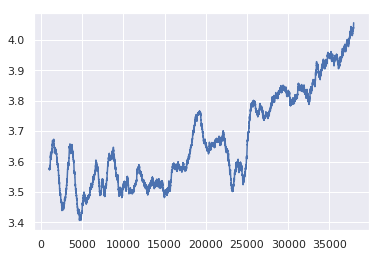

In [26]:
from pandas import Series
import matplotlib.pyplot as plt

plt.plot(Series.rolling(Series(star_ratings), window=1000).mean())

Once you've found a good value of `n_neighbors`, submit the model to the grader.  (*N.B.* "Good" is a relative measure here.  The reference solution has a r-squared value of only 0.02.  There is just rather little signal available for modeling.)

In [27]:
df_y=df['stars']
df_X=df.drop('stars',axis=1)
df_X.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,state,type
0,{'By Appointment Only': True},vcNAWiLM4dR7D2nwwJ7nCA,"[Doctors, Health & Medical]",Phoenix,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",33.499313,-111.983758,"Eric Goldberg, MD",[],True,7,AZ,business
1,"{'Take-out': True, 'Good For': {'dessert': Fal...",JwUE5GmEO-sH1FuwJgKBlQ,[Restaurants],De Forest,"6162 US Highway 51\nDe Forest, WI 53532",{},43.238893,-89.335844,Pine Cone Restaurant,[],True,26,WI,business
2,"{'Take-out': True, 'Good For': {'dessert': Fal...",uGykseHzyS5xAMWoN6YUqA,"[American (Traditional), Restaurants]",De Forest,"505 W North St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '06:00'}...",43.252267,-89.353437,Deforest Family Restaurant,[],True,16,WI,business
3,"{'Take-out': True, 'Wi-Fi': 'free', 'Takes Res...",LRKJF43s9-3jG9Lgx4zODg,"[Food, Ice Cream & Frozen Yogurt, Fast Food, R...",De Forest,"4910 County Rd V\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '10:30'}...",43.251045,-89.374983,Culver's,[],True,7,WI,business
4,"{'Take-out': True, 'Has TV': False, 'Outdoor S...",RgDg-k9S5YD_BaxMckifkg,"[Chinese, Restaurants]",De Forest,"631 S Main St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '11:00'}...",43.240875,-89.343722,Chang Jiang Chinese Kitchen,[],True,3,WI,business


In [28]:
from sklearn.model_selection import train_test_split,GridSearchCV

df_train, df_test = train_test_split(df,stratify=df_y,test_size=0.25)

In [29]:
df_train_y=df.stars
df_train_X=df.drop('stars',axis=1)

In [30]:
df_test_X=df.drop('stars',axis=1)
df_test_y=df.stars

In [31]:
df_train_X.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,state,type
0,{'By Appointment Only': True},vcNAWiLM4dR7D2nwwJ7nCA,"[Doctors, Health & Medical]",Phoenix,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",33.499313,-111.983758,"Eric Goldberg, MD",[],True,7,AZ,business
1,"{'Take-out': True, 'Good For': {'dessert': Fal...",JwUE5GmEO-sH1FuwJgKBlQ,[Restaurants],De Forest,"6162 US Highway 51\nDe Forest, WI 53532",{},43.238893,-89.335844,Pine Cone Restaurant,[],True,26,WI,business
2,"{'Take-out': True, 'Good For': {'dessert': Fal...",uGykseHzyS5xAMWoN6YUqA,"[American (Traditional), Restaurants]",De Forest,"505 W North St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '06:00'}...",43.252267,-89.353437,Deforest Family Restaurant,[],True,16,WI,business
3,"{'Take-out': True, 'Wi-Fi': 'free', 'Takes Res...",LRKJF43s9-3jG9Lgx4zODg,"[Food, Ice Cream & Frozen Yogurt, Fast Food, R...",De Forest,"4910 County Rd V\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '10:30'}...",43.251045,-89.374983,Culver's,[],True,7,WI,business
4,"{'Take-out': True, 'Has TV': False, 'Outdoor S...",RgDg-k9S5YD_BaxMckifkg,"[Chinese, Restaurants]",De Forest,"631 S Main St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '11:00'}...",43.240875,-89.343722,Chang Jiang Chinese Kitchen,[],True,3,WI,business


In [32]:
param_grid=[
    {'knn':[KNeighborsRegressor()],
    'knn__n_neighbors':[100]}
]
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)


In [33]:
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)


In [34]:
grid_search.fit(df_X,df_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('cst', ColumnSelectTransformer(col_names=['latitude', 'longitude'])), ('knn', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'knn': [KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=100, p=2,
          weights='uniform')], 'knn__n_neighbors': [100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
print("Best estimator found:")
print(grid_search.best_estimator_)

print("Best score:")
print(grid_search.best_score_)

print("Best parameters found:")
print(grid_search.best_params_)

In [ ]:
y_pred = grid_search.predict(df_test_X)

In [ ]:
def round_rating(value):
    return round(value * 2) / 2

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred_mod=list(map(round_rating,y_pred))

In [ ]:
import numpy as np

In [ ]:
df_test_y.values

In [35]:
grader.score('ml__lat_long_model', grid_search.predict)  # Edit to appropriate name

Your score:  1.0389501782238815


*Item for thought:* Why do we choose a non-linear model for this estimator?

*Extension:* Use a `sklearn.ensemble.RandomForestRegressor`, which is a more powerful non-linear model.  Can you get better performance with this than with the `KNeighborsRegressor`?

## category_model

While location is important, we could also try seeing how predictive the
venue's category is.  Build an estimator that considers only the categories.

The categories come as a list of strings, but the built-in estimators all need numeric input.  The standard way to deal with categorical features is **one-hot encoding**, also known as dummy variables.  In this approach, each category gets its own column in the feature matrix.  If the row has a given category, that column gets filled with a 1.  Otherwise, it is 0.

The `ColumnSelectTransformer` from the previous question can be used to extract the categories column as a list of strings.  Scikit Learn provides [`DictVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html#sklearn.feature_extraction.DictVectorizer), which takes in a list of dictionaries.  It creates a column in the output matrix for each key in the dictionary and fills it with the value associated with it.  Missing keys are filled with zeros.  Therefore, we need only build a transformer that takes a list strings to a dictionary with keys given by those strings and values one.

In [ ]:
df.categories[:10]

In [36]:
class DictEncoder(base.BaseEstimator, base.TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def _transform(self,alist):
        if len(alist) ==1:
            alist=sum(alist,[])
        return dict(zip(alist,[1]*len(alist)))
    
    def transform(self, X):
        
        return list(map(self._transform,X))
        # X will come in as a list of lists of lists.  Return a list of
        # dictionaries corresponding to those inner lists.

That should allow this to pass:

In [37]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)

In [ ]:
df.categories[:10].tolist()

In [38]:
assert (DictEncoder().fit_transform([[['a']], [['b', 'c']]])
        == [{'a': 1}, {'b': 1, 'c': 1}])

Set up a pipeline with your `ColumnSelectTransformer`, your `DictEncoder`, the `DictVectorizer`, and a regularized linear model, like `Ridge`, as the estimator.  This model will have a large number of features, one for each category, so there is a significant danger of overfitting.  Use cross validation to choose the best regularization parameter.

In [39]:
from sklearn import linear_model
from sklearn.feature_extraction import DictVectorizer
cat_pipe = Pipeline([('cst',ColumnSelectTransformer(['categories'])),
                     ('DictEn',DictEncoder()),
                     ('DictVec',DictVectorizer(sparse=False)),
                     ('Ridge', linear_model.Ridge(alpha = 0.1))
                     
        # ColumnSelectTransformer
        # KNeighborsRegressor
    ])

In [40]:
cat_pipe = Pipeline([('cst',ColumnSelectTransformer(['categories'])),
                     ('DictEn',DictEncoder()),
                     ('DictVec',DictVectorizer(sparse=False)),
                     ('Ridge', linear_model.Ridge(alpha = 0.1))
                     
        # ColumnSelectTransformer
        # KNeighborsRegressor
    ])

param_grid=[
    {'Ridge':[linear_model.Ridge()],
    'Ridge__alpha':[1.0],
    }
]
grid_search_cat = GridSearchCV(cat_pipe, param_grid=param_grid, cv=10)

In [41]:
grid_search_cat = GridSearchCV(cat_pipe, param_grid=param_grid, cv=10)

In [43]:
grid_search_cat.fit(df_X,df_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('cst', ColumnSelectTransformer(col_names=['categories'])), ('DictEn', DictEncoder()), ('DictVec', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('Ridge', Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'Ridge': [Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)], 'Ridge__alpha': [1.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
print("Best estimator found:")
print(grid_search_cat.best_estimator_)

print("Best score:")
print(grid_search_cat.best_score_)

print("Best parameters found:")
print(grid_search_cat.best_params_)

In [44]:
grader.score('ml__category_model', grid_search_cat.predict)  # Edit to appropriate name

Your score:  0.9650792586503797


In [50]:
cat_pipe_mod = Pipeline([('cst',ColumnSelectTransformer(['categories'])),
                     ('DictEn',DictEncoder()),
                     ('DictVec',DictVectorizer(sparse=False)),
                     ('TfidTransform',text.TfidfTransformer()),
                     ('Ridge', linear_model.Ridge(alpha = 1))
                     
        # ColumnSelectTransformer
        # KNeighborsRegressor
    ])

In [52]:
cat_pipe_mod.fit(df_X,df_y)

Pipeline(memory=None,
     steps=[('cst', ColumnSelectTransformer(col_names=['categories'])), ('DictEn', DictEncoder()), ('DictVec', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('TfidTransform', TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)), ('Ridge', Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [53]:
grader.score('ml__category_model', cat_pipe_mod.predict)  # Edit to appropriate name

Your score:  1.0109006255602029


*Extension:* Some categories (e.g. Restaurants) are not very specific.  Others (Japanese sushi) are much more so.  One way to deal with this is with an measure call term-frequency-inverse-document-frequency (TF-IDF).  Add in a `sklearn.feature_extraction.text.TfidfTransformer` between the `DictVectorizer` and the linear model, and see if that improves performance.

*Extension:* Can you beat the performance of the linear estimator with a
non-linear model?

## attribute_model

There is even more information in the attributes for each venue.  Let's build an estimator based on these.

Venues attributes may be nested:
```
{
  'Attire': 'casual',
  'Accepts Credit Cards': True,
  'Ambiance': {'casual': False, 'classy': False}
}
```
We wish to encode them with one-hot encoding.  The `DictVectorizer` can do this, but only once we've flattened the dictionary to a single level, like so:
```
{
  'Attire_casual' : 1,
  'Accepts Credit Cards': 1,
  'Ambiance_casual': 0,
  'Ambiance_classy': 0
}
```

Build a custom transformer that flattens the attributes dictionary.  Place this in a pipeline with a `DictVectorizer` and a regressor.

You may find it difficult to find a single regressor that does well enough.  A common solution is to use a linear model to fit the linear part of some data, and use a non-linear model to fit the residual that the linear model can't fit.  Build a residual estimator that takes as an argument two other estimators.  It should use the first to fit the raw data and the second to fit the residuals of the first.

In [201]:
class Att_converter(base.BaseEstimator, base.TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def _transform(self,data):
        
        new_data=pd.io.json.json_normalize(data,sep="_")
        new_data.replace(True,1,inplace=True)
        new_data.replace(False,0,inplace=True)
        new_data.fillna(0, inplace=True)
        return pd.get_dummies(new_data)
    
    def _drop_zero_columns(self,data):
        alist=[i  for i in data.columns.tolist() if i[-2:] == "_0"]
        return data.drop(alist,axis=1)
    
    def transform(self, X):
        if not isinstance(X, pd.DataFrame):
            X=pd.DataFrame(X)
        new_data=self._transform(X.attributes)
        #clean_data= self._drop_zero_columns(new_data)
        
        return new_data
        # X will come in as a list of lists of lists.  Return a list of
        # dictionaries corresponding to those inner lists.

In [55]:
class features_align(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self):
        self.cols=None
        self.df=None
    
    def fit(self, X,y=None):
        #print(X.head())
        self.cols = X.columns.tolist()
        return self


    
    
    def transform(self, X):
        if not isinstance(X, pd.DataFrame):
            X=pd.DataFrame(X)
        missing_cols = set( self.cols ) - set( X.columns.tolist() )
        for c in missing_cols:
            X[c]= 0
        X = X[self.cols]
        new_data=X.astype('category', categories=self.cols)
        #clean_data= self._drop_zero_columns(new_data)
        
        return new_data

In [203]:
att_pipe= Pipeline([('att_conv',Att_converter()),
                    ('f_align',features_align()),
#                      ('DictEn',DictEncoder()),
#                      ('DictVec',DictVectorizer(sparse=False)),
                    #('vect', text.CountVectorizer()),
                    #('TfidTransform',text.TfidfTransformer()),
                    #('TfidVec',text.TfidfVectorizer()),
                    #('Lasso', linear_model.Lasso())
                    ('Ridge',linear_model.Ridge(alpha=1.0))
                    #('Reg', linear_model.LinearRegression())
                     
        # ColumnSelectTransformer
        # KNeighborsRegressor
    ])

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
class myEstimator(base.BaseEstimator, base.RegressorMixin):
    def __init__(self):
        self.reg=linear_model.LinearRegression()
        self.model2=RandomForestRegressor(max_depth=85,n_estimators=200,min_samples_split=10,max_features='log2')
        #self.model2=svm.SVR()
        
    
        # initialization code
    def fit(self, X, y):
        self.reg.fit(X,y)
        y_predict=self.reg.predict(X)
        residual=y-y_predict
        #self.RF.fit(X,residual)
        self.model2.fit(X,residual)
    
        # fit the model ...
        return self
#     def roundPartial (self, result):
#         return round (result / 0.5) * 0.5
    def predict(self, X):
        reg_y_predict=self.reg.predict(X)
        residual_predict=self.model2.predict(X)
        result=reg_y_predict+residual_predict
        return result
        #return list(map(self.roundPartial,result))

    def score(self, X, y):
        return # custom score implementation

In [204]:
att_pipe.fit(df_X,df_y)

Pipeline(memory=None,
     steps=[('att_conv', Att_converter()), ('f_align', features_align()), ('Ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [206]:
att_predict_y=att_pipe.predict(df_test_X)

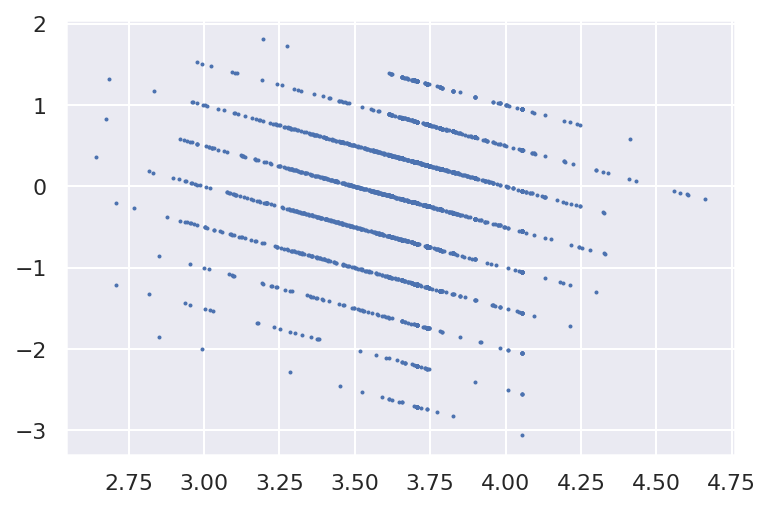

In [228]:
plt.show()
plt.plot(att_predict_y[:3000],(df_test_y.values-att_predict_y)[:3000],'.',markersize=2,linewidth=0.05)

(array([  35.,  397.,  709., 1989., 4791., 7759., 9753., 7596., 4777.,
         132.]),
 array([-3.3875933 , -2.84761678, -2.30764027, -1.76766376, -1.22768725,
        -0.68771074, -0.14773423,  0.39224228,  0.93221879,  1.47219531,
         2.01217182]),
 <a list of 10 Patch objects>)

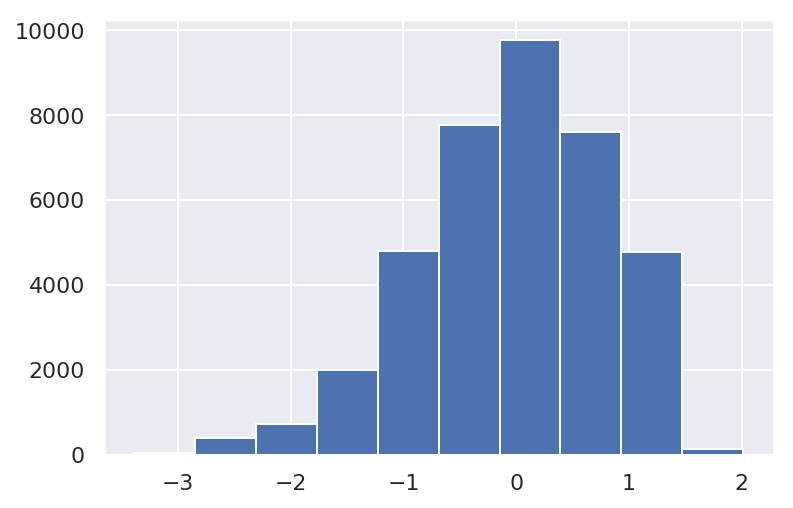

In [230]:
plt.hist((df_test_y.values-att_predict_y))

In [58]:
# class myEstimator(base.BaseEstimator, base.RegressorMixin):
#     def __init__(self):
#         self.reg=linear_model.LinearRegression()
#         self.model2=RandomForestRegressor(max_depth=85,n_estimators=200,min_samples_split=10,max_features='log2')
#         #self.model2=svm.SVR()
        
    
#         # initialization code
#     def fit(self, X, y):
#         self.reg.fit(X,y)
#         y_predict=self.reg.predict(X)
#         residual=y-y_predict
#         #self.RF.fit(X,residual)
#         self.model2.fit(X,residual)
    
#         # fit the model ...
#         return self
# #     def roundPartial (self, result):
# #         return round (result / 0.5) * 0.5
#     def predict(self, X):
#         reg_y_predict=self.reg.predict(X)
#         residual_predict=self.model2.predict(X)
#         result=reg_y_predict+residual_predict
        
#         return list(map(self.roundPartial,result))

In [59]:

att_pipe_mod= Pipeline([('att_conv',Att_converter()),
                    ('f_align',features_align()),

                    #('Reg', linear_model.LinearRegression(n_jobs=10)),
                    ('myEst',myEstimator())
                     
        # ColumnSelectTransformer
        # KNeighborsRegressor
    ])

In [ ]:
# param_grid=[
#     {'myEst_RF':[myEstimator().model2],
#     'myEst_RF__max_depth':[2, 10,50,100]}
# ]

# grid_search_att_mod = GridSearchCV(att_pipe_mod, param_grid=param_grid, cv=10)

In [62]:
# grid_search_att_mod.fit(df_X,df_y)

In [ ]:
# att_pipe_mod.fit(df_train_X,df_train_y)

In [61]:
att_pipe_mod.fit(df_X,df_y)

Pipeline(memory=None,
     steps=[('att_conv', Att_converter()), ('f_align', features_align()), ('myEst', myEstimator())])

In [ ]:
# att_pipe_mod.score(df_train_X,df_train_y)

In [118]:
att_pipe_mod.predict(df_test_X)

array([3.8970484 , 3.67507689, 3.72119021, ..., 3.68373204, 4.01050015,
       3.71615281])

In [208]:
grader.score('ml__attribute_model', att_pipe.predict)  # Edit to appropriate name

Your score:  0.7940067986566662


In [63]:
grader.score('ml__attribute_model', att_pipe_mod.predict)  # Edit to appropriate name

Your score:  1.0415592549015344


## full_model

So far we have only built models based on individual features.  Now we will build an ensemble regressor that averages together the estimates of the four previous regressors.

In order to use the existing models as input to an estimator, we will have to turn them into transformers.  (A pipeline can contain at most a single estimator.)  Build a custom `ModelTransformer` class that takes an estimator as an argument.  When `fit()` is called, the estimator should be fit.  When `transform()` is called, the estimator's `predict()` method should be called, and its results returned.

Note that the output of the `transform()` method should be a 2-D array with a single column, in order for it to work well with the Scikit Learn pipeline.  If you're using NumPy arrays, you can use `.reshape(-1, 1)` to create a column vector.  If you are just using Python lists, you will want a list of lists of single elements.

In [135]:
class EstimatorTransformer(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, estimator):
        # What needs to be done here?
        self.estimator=estimator
    
    def fit(self, X, y):
        # Fit the stored estimator.
        # Question: what should be returned?
        self.estimator.fit(X,y)
        return self
    
    def transform(self, X):
        # Use predict on the stored estimator as a "transformation".
        # Be sure to return a 2-D array.
        results=self.estimator.predict(X)
        if isinstance(results,list):
            return [[i] for i in results]
        if isinstance(results,np.ndarray):
            return results.reshape(-1, 1)
            
        

This should work as follows:

In [88]:
city_trans = EstimatorTransformer(city_est)
city_trans.fit(df_X, df_y)


In [89]:
city_trans.transform(data[:5])

[[3.6702903946388683], [3.75], [3.75], [3.75], [3.75]]

In [90]:
assert ([r[0] for r in city_trans.transform(data[:5])]
        == city_est.predict(data[:5]))

In [99]:
nbr_trans=EstimatorTransformer(KNeighborsRegressor(n_neighbors=100))

In [100]:
nbr_trans.fit(df_X[['latitude', 'longitude']],df_y)

In [105]:
b=nbr_trans.transform(df_X[['latitude', 'longitude']][:5])

In [106]:
b 

array([[3.9  ],
       [3.415],
       [3.555],
       [3.605],
       [3.545]])

Create an instance of `ModelTransformer` for each of the previous four models. Combine these together in a single feature matrix with a
[`FeatureUnion`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html#sklearn.pipeline.FeatureUnion).

In [ ]:
cat_pipe_mod = Pipeline([('cst',ColumnSelectTransformer(['categories'])),
                     ('DictEn',DictEncoder()),
                     ('DictVec',DictVectorizer(sparse=False)),
                     ('TfidTransform',text.TfidfTransformer()),
                     ('Ridge', linear_model.Ridge(alpha = 1))
    ])

In [ ]:

att_pipe_mod= Pipeline([('att_conv',Att_converter()),
                    ('f_align',features_align()),

                    #('Reg', linear_model.LinearRegression(n_jobs=10)),
                    ('myEst',myEstimator())
                     
        # ColumnSelectTransformer
        # KNeighborsRegressor
    ])

In [136]:
from sklearn.pipeline import FeatureUnion

union = FeatureUnion([
        ('city',Pipeline([
            ('city_est',EstimatorTransformer(city_est))
        ])
        ),
        ('nbr',Pipeline([
            ('cst',ColumnSelectTransformer(['latitude', 'longitude'])),
            ('knn',EstimatorTransformer(KNeighborsRegressor(n_neighbors=100)))
        ])
        ),
        ('cat',Pipeline([
            ('cst',ColumnSelectTransformer(['categories'])),
            ('DictEn',DictEncoder()),
            ('DictVec',DictVectorizer(sparse=False)),
            ('TfidTransform',text.TfidfTransformer()),
            ('Ridge', EstimatorTransformer(linear_model.Ridge(alpha = 1)))
        ]),
        ),
        ('att',Pipeline([
            ('att_conv',Att_converter()),
            ('f_align',features_align()),
            ('myEst',EstimatorTransformer(myEstimator()))
        ]),
        )
        ])

This should return a feature matrix with four columns.

In [ ]:
class All_converter(base.BaseEstimator, base.TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def _cat_transform(self,X):
        DictEncoder(X.ca)
        
        return pd.get_dummies(new_data)
    
    def _drop_zero_columns(self,data):
        alist=[i  for i in data.columns.tolist() if i[-2:] == "_0"]
        return data.drop(alist,axis=1)
    
    def transform(self, X):
        if not isinstance(X, pd.DataFrame):
            X=pd.DataFrame(X)
        new_data=self._transform(X.attributes)
        #clean_data= self._drop_zero_columns(new_data)
        
        return new_data

In [181]:
df_X[['city','latitude', 'longitude','categories','attributes']]

,city,latitude,longitude,categories,attributes
0,Phoenix,33.499313,-111.983758,"[Doctors, Health & Medical]",{'By Appointment Only': True}
1,De Forest,43.238893,-89.335844,[Restaurants],"{'Take-out': True, 'Good For': {'dessert': Fal..."
2,De Forest,43.252267,-89.353437,"[American (Traditional), Restaurants]","{'Take-out': True, 'Good For': {'dessert': Fal..."
3,De Forest,43.251045,-89.374983,"[Food, Ice Cream & Frozen Yogurt, Fast Food, R...","{'Take-out': True, 'Wi-Fi': 'free', 'Takes Res..."
4,De Forest,43.240875,-89.343722,"[Chinese, Restaurants]","{'Take-out': True, 'Has TV': False, 'Outdoor S..."
5,Mc Farland,42.968507,-89.322920,"[Television Stations, Mass Media]",{}
6,Mc Farland,43.030356,-89.298544,"[Home Services, Heating & Air Conditioning/HVAC]",{}
7,Mc Farland,43.014093,-89.294175,"[Libraries, Public Services & Government]",{'Wi-Fi': 'free'}
8,Mc Farland,43.017124,-89.299119,"[Veterinarians, Pets]",{}
9,Mc Farland,43.017701,-89.303789,"[Bars, American (Traditional), Nightlife, Loun...","{'Alcohol': 'full_bar', 'Noise Level': 'loud',..."


In [137]:
union.fit(df_X, df_y)


FeatureUnion(n_jobs=1,
       transformer_list=[('city', Pipeline(memory=None,
     steps=[('city_est', EstimatorTransformer(estimator=CityEstimator()))])), ('nbr', Pipeline(memory=None,
     steps=[('cst', ColumnSelectTransformer(col_names=['latitude', 'longitude'])), ('knn', EstimatorTransformer(estimator=KNeighborsRegressor(a...rter()), ('f_align', features_align()), ('myEst', EstimatorTransformer(estimator=myEstimator()))]))],
       transformer_weights=None)

In [138]:
trans_data = union.transform(df_X[:10])
trans_data

array([[3.67029039e+00, 3.90000000e+00, 3.25508908e+00, 7.68338470e+09],
       [3.75000000e+00, 3.41500000e+00, 3.06575054e+00, 7.68338470e+09],
       [3.75000000e+00, 3.55500000e+00, 3.21467001e+00, 7.68338470e+09],
       [3.75000000e+00, 3.60500000e+00, 3.30622736e+00, 7.68338470e+09],
       [3.75000000e+00, 3.54500000e+00, 3.30336145e+00, 7.68338470e+09],
       [3.10000000e+00, 3.38000000e+00, 3.45519665e+00, 7.68338470e+09],
       [3.10000000e+00, 3.49500000e+00, 4.10312954e+00, 7.68338470e+09],
       [3.10000000e+00, 3.47500000e+00, 3.97397559e+00, 7.68338470e+09],
       [3.10000000e+00, 3.48000000e+00, 4.10711629e+00, 7.68338470e+09],
       [3.10000000e+00, 3.43500000e+00, 3.40158135e+00, 7.68338470e+09]])

In [134]:
trans_data.shape

(10, 4)

In [113]:
assert trans_data.shape == (10, 4)

Finally, use a pipeline to combine the feature union with a linear regression (or another model) to weight the predictions.

In [119]:
att_pipe_mod.predict(df_test_X)

array([3.8970484 , 3.67507689, 3.72119021, ..., 3.68373204, 4.01050015,
       3.71615281])

In [120]:
att_pipe_mod.predict(df_test_X[:10])

array([7.6833847e+09, 7.6833847e+09, 7.6833847e+09, 7.6833847e+09,
       7.6833847e+09, 7.6833847e+09, 7.6833847e+09, 7.6833847e+09,
       7.6833847e+09, 7.6833847e+09])

In [126]:
att_pipe_mod

Pipeline(memory=None,
     steps=[('att_conv', Att_converter()), ('f_align', features_align()), ('myEst', myEstimator())])

In [132]:
total_pipeline = Pipeline([
  ('features', FeatureUnion([
        ('city',Pipeline([
            ('city_est',EstimatorTransformer(city_est))
        ])
        ),
        ('nbr',Pipeline([
            ('cst',ColumnSelectTransformer(['latitude', 'longitude'])),
            ('knn',EstimatorTransformer(KNeighborsRegressor(n_neighbors=100)))
        ])
        ),
        ('cat',Pipeline([
            ('cst',ColumnSelectTransformer(['categories'])),
            ('DictEn',DictEncoder()),
            ('DictVec',DictVectorizer(sparse=False)),
            ('TfidTransform',text.TfidfTransformer()),
            ('Ridge', EstimatorTransformer(linear_model.Ridge(alpha = 1)))
        ]),
        ),
        ('att',Pipeline([
            ('att_conv',Att_converter()),
            ('f_align',features_align()),
            ('myEst',EstimatorTransformer(myEstimator()))
        ]),
        )
        ])),
  ('final classifier', linear_model.LinearRegression())
])

In [139]:
total_pipeline = Pipeline([
    ('features',union),
    ('final_clf',linear_model.LinearRegression())
])
    

In [168]:
total_pipeline = Pipeline([
    ('features',union),
    ('svr',SVR())
])
    

In [ ]:
cat_pipe = Pipeline([('cst',ColumnSelectTransformer(['categories'])),
                     ('DictEn',DictEncoder()),
                     ('DictVec',DictVectorizer(sparse=False)),
                     ('Ridge', linear_model.Ridge(alpha = 0.1))
                     
        # ColumnSelectTransformer
        # KNeighborsRegressor
    ])

param_grid=[
    {'Ridge':[linear_model.Ridge()],
    'Ridge__alpha':[1.0],
    }
]
grid_search_cat = GridSearchCV(cat_pipe, param_grid=param_grid, cv=10)

In [177]:
param_grid_final=[
    {'svr':[SVR()],
    #"svr__C": [1e0, 1e1, 1e2]#,
    "svr__gamma": np.logspace(-2, 2)
    }
]
grid_search_final = GridSearchCV(total_pipeline, param_grid=param_grid_final, cv=10)


In [179]:
#grid_search_final.fit(df_X,df_y)

In [175]:
print("Best estimator found:")
print(grid_search_final.best_estimator_)

print("Best score:")
print(grid_search_final.best_score_)

print("Best parameters found:")
print(grid_search_final.best_params_)

Best estimator found:
Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('city', Pipeline(memory=None,
     steps=[('city_est', EstimatorTransformer(estimator=CityEstimator()))])), ('nbr', Pipeline(memory=None,
     steps=[('cst', ColumnSelectTransformer(col_names=['latitude', 'longitude'])), ('knn', Es... epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])
Best score:
0.053130044836827914
Best parameters found:
{'svr': SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'svr__C': 10.0}


In [156]:
total_pipeline.fit(df_X,df_y)

Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('city', Pipeline(memory=None,
     steps=[('city_est', EstimatorTransformer(estimator=CityEstimator()))])), ('nbr', Pipeline(memory=None,
     steps=[('cst', ColumnSelectTransformer(col_names=['latitude', 'longitude'])), ('knn', Es... epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

In [176]:
grader.score('ml__full_model', grid_search_final.predict)  # Edit to appropriate name

Your score:  0.8747831016355098


*Extension:* By combining our models with a linear model, we will be unable to notice any correlation between features.  We don't expect all attributes to have the same effect on all venues.  For example, "Ambiance: divey" might be a bad indicator for a restaurant but a good one for a bar.  Nonlinear models can pick up on this interaction.  Replace the linear model combining the predictions with a nonlinear one like [`RandomForestRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor).  Better yet, use the nonlinear model to fit the residuals of the linear model.

The score for this question is just a ratio of the score of your model to the score of a reference solution.  Can you beat the reference solution and get a score greater than 1.0?

*Copyright &copy; 2016 The Data Incubator.  All rights reserved.*